# Import Libraries

In [1]:
import datetime
print("Model execution started at:" + datetime.datetime.today().ctime())

Model execution started at:Sun Mar  8 14:24:18 2020


In [2]:
import src.dataset.dataset as dst
import src.dataset.dataloader as dl
import src.preprocessing.preprocessing as preprocessing
import src.utils.utils as utils
import src.models.train_model as train
import src.visualization.plotdata as plotdata
%config IPCompleter.greedy=True

In [3]:
def printgpuinfo():
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
      print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
      print('and then re-execute this cell.')
    else:
      print(gpu_info)

In [4]:
def showsysteminfo():
    from psutil import virtual_memory
    ram_gb = virtual_memory().total / 1e9
    print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

    if ram_gb < 20:
      print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
      print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
      print('re-execute this cell.')
    else:
      print('You are using a high-RAM runtime!')

In [5]:
import torch
print(torch.__version__)

1.4.0


In [6]:
preproc = preprocessing.Preprocessing()
train_transforms = preproc.gettraintransforms()
test_transforms = preproc.gettesttransforms()

In [7]:
ds = dst.Dataset()
train_dataset = ds.gettraindataset(train_transforms)
test_dataset = ds.gettestdataset(test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
batch_size = 128
dataloader = dl.Cifar10Dataloader(traindataset=train_dataset, testdataset=test_dataset,batch_size=batch_size)
train_loader = dataloader.gettraindataloader()
test_loader = dataloader.gettestdataloader()

CUDA Available? True
128


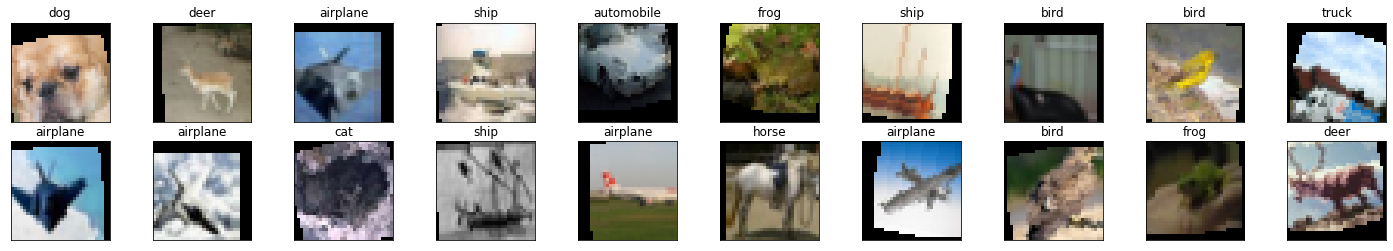

In [9]:
# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

dataiterator = iter(train_loader)
plotdata.PlotData.showImagesfromdataset(dataiterator,classes=classes)

In [10]:
cnn_model, device = utils.Utils.createmodelresnet18()
train_model = train.TrainModel()
train_model.showmodelsummary(cnn_model)

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [11]:
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=0)
scheduler = utils.Utils.createscheduler(optimizer, mode='max', factor=0.1, patience=2,
                                        verbose=True)

In [12]:
lr_data = []
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
epochs = 51
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    train_model.train(cnn_model, device, train_loader, optimizer, 1)
    t_acc_epoch = train_model.test(cnn_model, device, test_loader, class_correct=class_correct,
                                   class_total=class_total, epoch=epoch)
    scheduler.step(t_acc_epoch)
    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


/home/abhijit/.virtualenvs/dl4cv/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Loss=1.2934763431549072 Batch_id=390 Accuracy=43.61: 100%|██████████| 391/391 [00:48<00:00,  8.02it/s]



Test set: Average loss: 0.0105, Accuracy: 5330/10000 (53.30%)

Validation accuracy increased (0.000000 --> 53.300000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  2
EPOCH: 2


Loss=0.7706853151321411 Batch_id=390 Accuracy=59.93: 100%|██████████| 391/391 [00:49<00:00,  7.92it/s]



Test set: Average loss: 0.0097, Accuracy: 5846/10000 (58.46%)

Validation accuracy increased (53.300000 --> 58.460000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  3
EPOCH: 3


Loss=0.8247798681259155 Batch_id=390 Accuracy=67.53: 100%|██████████| 391/391 [00:49<00:00,  7.83it/s]



Test set: Average loss: 0.0075, Accuracy: 6826/10000 (68.26%)

Validation accuracy increased (58.460000 --> 68.260000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  4
EPOCH: 4


Loss=0.612287163734436 Batch_id=390 Accuracy=72.38: 100%|██████████| 391/391 [00:50<00:00,  7.76it/s] 



Test set: Average loss: 0.0076, Accuracy: 7059/10000 (70.59%)

Validation accuracy increased (68.260000 --> 70.590000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  5
EPOCH: 5


Loss=1.0261794328689575 Batch_id=390 Accuracy=75.85: 100%|██████████| 391/391 [00:55<00:00,  7.10it/s] 



Test set: Average loss: 0.0049, Accuracy: 7900/10000 (79.00%)

Validation accuracy increased (70.590000 --> 79.000000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  6
EPOCH: 6


Loss=0.6218270063400269 Batch_id=390 Accuracy=78.22: 100%|██████████| 391/391 [00:56<00:00,  6.98it/s] 



Test set: Average loss: 0.0047, Accuracy: 8012/10000 (80.12%)

Validation accuracy increased (79.000000 --> 80.120000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  7
EPOCH: 7


Loss=0.5954083204269409 Batch_id=390 Accuracy=79.81: 100%|██████████| 391/391 [00:58<00:00,  6.71it/s] 



Test set: Average loss: 0.0040, Accuracy: 8232/10000 (82.32%)

Validation accuracy increased (80.120000 --> 82.320000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  8
EPOCH: 8


Loss=0.7090428471565247 Batch_id=390 Accuracy=81.27: 100%|██████████| 391/391 [00:58<00:00,  6.65it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8220/10000 (82.20%)

Learning rate = 0.01  for epoch:  9
EPOCH: 9


Loss=0.3528062105178833 Batch_id=390 Accuracy=82.51: 100%|██████████| 391/391 [01:01<00:00,  6.36it/s] 



Test set: Average loss: 0.0040, Accuracy: 8308/10000 (83.08%)

Validation accuracy increased (82.320000 --> 83.080000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  10
EPOCH: 10


Loss=0.574985682964325 Batch_id=390 Accuracy=83.63: 100%|██████████| 391/391 [01:02<00:00,  6.30it/s]  



Test set: Average loss: 0.0036, Accuracy: 8495/10000 (84.95%)

Validation accuracy increased (83.080000 --> 84.950000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  11
EPOCH: 11


Loss=0.47697463631629944 Batch_id=390 Accuracy=84.36: 100%|██████████| 391/391 [01:01<00:00,  6.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8204/10000 (82.04%)

Learning rate = 0.01  for epoch:  12
EPOCH: 12


Loss=0.36796650290489197 Batch_id=390 Accuracy=85.21: 100%|██████████| 391/391 [01:00<00:00,  6.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8330/10000 (83.30%)

Learning rate = 0.01  for epoch:  13
EPOCH: 13


Loss=0.42249226570129395 Batch_id=390 Accuracy=85.89: 100%|██████████| 391/391 [01:04<00:00,  6.03it/s]



Test set: Average loss: 0.0034, Accuracy: 8596/10000 (85.96%)

Validation accuracy increased (84.950000 --> 85.960000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  14
EPOCH: 14


Loss=0.5338969826698303 Batch_id=390 Accuracy=86.76: 100%|██████████| 391/391 [01:03<00:00,  6.18it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8568/10000 (85.68%)

Learning rate = 0.01  for epoch:  15
EPOCH: 15


Loss=0.3988552689552307 Batch_id=390 Accuracy=87.30: 100%|██████████| 391/391 [01:03<00:00,  6.15it/s] 



Test set: Average loss: 0.0032, Accuracy: 8690/10000 (86.90%)

Validation accuracy increased (85.960000 --> 86.900000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  16
EPOCH: 16


Loss=0.46596384048461914 Batch_id=390 Accuracy=87.81: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8655/10000 (86.55%)

Learning rate = 0.01  for epoch:  17
EPOCH: 17


Loss=0.3194575607776642 Batch_id=390 Accuracy=87.98: 100%|██████████| 391/391 [01:01<00:00,  6.32it/s] 



Test set: Average loss: 0.0029, Accuracy: 8826/10000 (88.26%)

Validation accuracy increased (86.900000 --> 88.260000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  18
EPOCH: 18


Loss=0.41863569617271423 Batch_id=390 Accuracy=88.83: 100%|██████████| 391/391 [01:04<00:00,  6.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8692/10000 (86.92%)

Learning rate = 0.01  for epoch:  19
EPOCH: 19


Loss=0.3162210285663605 Batch_id=390 Accuracy=89.36: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8816/10000 (88.16%)

Learning rate = 0.01  for epoch:  20
EPOCH: 20


Loss=0.27938151359558105 Batch_id=390 Accuracy=89.60: 100%|██████████| 391/391 [01:03<00:00,  6.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8817/10000 (88.17%)

Epoch    20: reducing learning rate of group 0 to 1.0000e-03.
Learning rate = 0.001  for epoch:  21
EPOCH: 21


Loss=0.3031381070613861 Batch_id=390 Accuracy=92.30: 100%|██████████| 391/391 [01:02<00:00,  6.23it/s] 



Test set: Average loss: 0.0022, Accuracy: 9104/10000 (91.04%)

Validation accuracy increased (88.260000 --> 91.040000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.001  for epoch:  22
EPOCH: 22


Loss=0.19537696242332458 Batch_id=390 Accuracy=93.02: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]



Test set: Average loss: 0.0021, Accuracy: 9121/10000 (91.21%)

Validation accuracy increased (91.040000 --> 91.210000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.001  for epoch:  23
EPOCH: 23


Loss=0.17881076037883759 Batch_id=390 Accuracy=93.32: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9118/10000 (91.18%)

Learning rate = 0.001  for epoch:  24
EPOCH: 24


Loss=0.189031720161438 Batch_id=390 Accuracy=93.68: 100%|██████████| 391/391 [01:04<00:00,  6.02it/s]  



Test set: Average loss: 0.0022, Accuracy: 9133/10000 (91.33%)

Validation accuracy increased (91.210000 --> 91.330000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch    24: reducing learning rate of group 0 to 1.0000e-04.
Learning rate = 0.0001  for epoch:  25
EPOCH: 25


Loss=0.13338510692119598 Batch_id=390 Accuracy=93.98: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]



Test set: Average loss: 0.0021, Accuracy: 9138/10000 (91.38%)

Validation accuracy increased (91.330000 --> 91.380000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.0001  for epoch:  26
EPOCH: 26


Loss=0.21976891160011292 Batch_id=390 Accuracy=93.96: 100%|██████████| 391/391 [01:04<00:00,  6.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9136/10000 (91.36%)

Learning rate = 0.0001  for epoch:  27
EPOCH: 27


Loss=0.1395905613899231 Batch_id=390 Accuracy=94.01: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9132/10000 (91.32%)

Epoch    27: reducing learning rate of group 0 to 1.0000e-05.
Learning rate = 1e-05  for epoch:  28
EPOCH: 28


Loss=0.11186671257019043 Batch_id=390 Accuracy=94.13: 100%|██████████| 391/391 [01:04<00:00,  6.02it/s]



Test set: Average loss: 0.0021, Accuracy: 9141/10000 (91.41%)

Validation accuracy increased (91.380000 --> 91.410000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 1e-05  for epoch:  29
EPOCH: 29


Loss=0.10314381122589111 Batch_id=390 Accuracy=93.92: 100%|██████████| 391/391 [01:02<00:00,  6.21it/s]



Test set: Average loss: 0.0021, Accuracy: 9142/10000 (91.42%)

Validation accuracy increased (91.410000 --> 91.420000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 1e-05  for epoch:  30
EPOCH: 30


Loss=0.2960353493690491 Batch_id=390 Accuracy=93.89: 100%|██████████| 391/391 [01:04<00:00,  6.07it/s] 



Test set: Average loss: 0.0021, Accuracy: 9143/10000 (91.43%)

Validation accuracy increased (91.420000 --> 91.430000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch    30: reducing learning rate of group 0 to 1.0000e-06.
Learning rate = 1.0000000000000002e-06  for epoch:  31
EPOCH: 31


Loss=0.1331309974193573 Batch_id=390 Accuracy=94.14: 100%|██████████| 391/391 [01:04<00:00,  6.10it/s] 



Test set: Average loss: 0.0021, Accuracy: 9145/10000 (91.45%)

Validation accuracy increased (91.430000 --> 91.450000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 1.0000000000000002e-06  for epoch:  32
EPOCH: 32


Loss=0.19605951011180878 Batch_id=390 Accuracy=93.98: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]



Test set: Average loss: 0.0021, Accuracy: 9147/10000 (91.47%)

Validation accuracy increased (91.450000 --> 91.470000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 1.0000000000000002e-06  for epoch:  33
EPOCH: 33


Loss=0.12357193231582642 Batch_id=390 Accuracy=94.11: 100%|██████████| 391/391 [00:58<00:00,  6.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9145/10000 (91.45%)

Epoch    33: reducing learning rate of group 0 to 1.0000e-07.
Learning rate = 1.0000000000000002e-07  for epoch:  34
EPOCH: 34


Loss=0.16659849882125854 Batch_id=390 Accuracy=94.07: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9146/10000 (91.46%)

Learning rate = 1.0000000000000002e-07  for epoch:  35
EPOCH: 35


Loss=0.16111153364181519 Batch_id=390 Accuracy=94.09: 100%|██████████| 391/391 [01:01<00:00,  6.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9134/10000 (91.34%)

Learning rate = 1.0000000000000002e-07  for epoch:  36
EPOCH: 36


Loss=0.14743487536907196 Batch_id=390 Accuracy=93.97: 100%|██████████| 391/391 [01:01<00:00,  6.35it/s]



Test set: Average loss: 0.0021, Accuracy: 9153/10000 (91.53%)

Validation accuracy increased (91.470000 --> 91.530000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch    36: reducing learning rate of group 0 to 1.0000e-08.
Learning rate = 1.0000000000000004e-08  for epoch:  37
EPOCH: 37


Loss=0.1267900913953781 Batch_id=390 Accuracy=94.11: 100%|██████████| 391/391 [00:59<00:00,  6.58it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9145/10000 (91.45%)

Learning rate = 1.0000000000000004e-08  for epoch:  38
EPOCH: 38


Loss=0.07019459456205368 Batch_id=390 Accuracy=94.01: 100%|██████████| 391/391 [01:01<00:00,  6.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9150/10000 (91.50%)

Learning rate = 1.0000000000000004e-08  for epoch:  39
EPOCH: 39


Loss=0.14027494192123413 Batch_id=390 Accuracy=94.03: 100%|██████████| 391/391 [01:03<00:00,  6.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9142/10000 (91.42%)

Learning rate = 1.0000000000000004e-08  for epoch:  40
EPOCH: 40


Loss=0.14122521877288818 Batch_id=390 Accuracy=93.97: 100%|██████████| 391/391 [01:01<00:00,  6.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9145/10000 (91.45%)

Learning rate = 1.0000000000000004e-08  for epoch:  41
EPOCH: 41


Loss=0.20058560371398926 Batch_id=390 Accuracy=93.92: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9151/10000 (91.51%)

Learning rate = 1.0000000000000004e-08  for epoch:  42
EPOCH: 42


Loss=0.1661774069070816 Batch_id=390 Accuracy=94.11: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9142/10000 (91.42%)

Learning rate = 1.0000000000000004e-08  for epoch:  43
EPOCH: 43


Loss=0.13263103365898132 Batch_id=390 Accuracy=94.06: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9148/10000 (91.48%)

Learning rate = 1.0000000000000004e-08  for epoch:  44
EPOCH: 44


Loss=0.23544375598430634 Batch_id=390 Accuracy=93.90: 100%|██████████| 391/391 [01:07<00:00,  5.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9147/10000 (91.47%)

Learning rate = 1.0000000000000004e-08  for epoch:  45
EPOCH: 45


Loss=0.2521037459373474 Batch_id=390 Accuracy=93.97: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9135/10000 (91.35%)

Learning rate = 1.0000000000000004e-08  for epoch:  46
EPOCH: 46


Loss=0.1459505259990692 Batch_id=390 Accuracy=94.08: 100%|██████████| 391/391 [01:04<00:00,  6.10it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9138/10000 (91.38%)

Learning rate = 1.0000000000000004e-08  for epoch:  47
EPOCH: 47


Loss=0.1650419533252716 Batch_id=390 Accuracy=94.08: 100%|██████████| 391/391 [01:04<00:00,  6.03it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9144/10000 (91.44%)

Learning rate = 1.0000000000000004e-08  for epoch:  48
EPOCH: 48


Loss=0.28039008378982544 Batch_id=390 Accuracy=93.91: 100%|██████████| 391/391 [01:04<00:00,  6.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9142/10000 (91.42%)

Learning rate = 1.0000000000000004e-08  for epoch:  49
EPOCH: 49


Loss=0.09744866192340851 Batch_id=390 Accuracy=94.04: 100%|██████████| 391/391 [01:08<00:00,  5.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9145/10000 (91.45%)

Learning rate = 1.0000000000000004e-08  for epoch:  50
EPOCH: 50


Loss=0.20944133400917053 Batch_id=390 Accuracy=94.11: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]



Test set: Average loss: 0.0021, Accuracy: 9131/10000 (91.31%)

Learning rate = 1.0000000000000004e-08  for epoch:  51


In [13]:
import numpy as np
for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Accuracy of airplane: 86% (3332/3834)
Test Accuracy of automobile: 93% (3671/3911)
Test Accuracy of  bird: 84% (3393/4031)
Test Accuracy of   cat: 72% (2889/3960)
Test Accuracy of  deer: 86% (3443/3991)
Test Accuracy of   dog: 80% (3185/3944)
Test Accuracy of  frog: 90% (3535/3926)
Test Accuracy of horse: 89% (3550/3952)
Test Accuracy of  ship: 92% (3671/3979)
Test Accuracy of truck: 91% (3654/3972)

Test Accuracy (Overall): 86% (34323/39500)


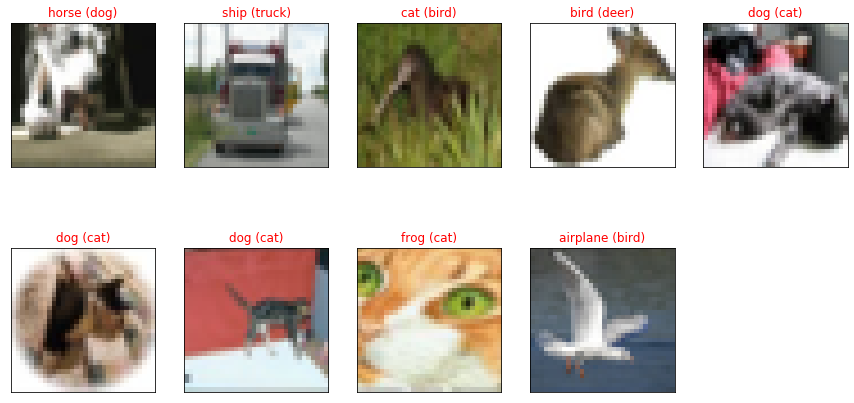

In [14]:
# obtain one batch of test images
dataiterator = iter(test_loader)
plotdata.PlotData.plotmisclassifiedimages(dataiterator=dataiterator,model=cnn_model,classes=classes)

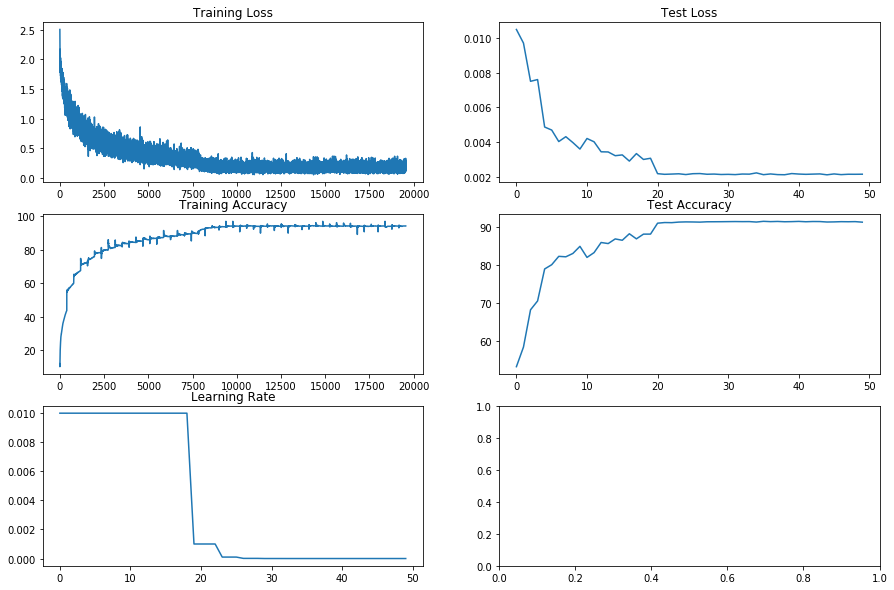

In [15]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
plotdata.PlotData.plottesttraingraph(train_losses=train_losses,train_acc=train_acc,test_losses=test_losses,
                                     test_acc=test_acc,lr_data=lr_data)

In [16]:
utils.Utils.savemodel(model=cnn_model,epoch=epochs,path="savedmodels/finalmodelwithdata.pt",optimizer_state_dict=optimizer.state_dict
                      ,train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses)